# Simple Linear Regression







## 1. Linear regression

Linear regression은 종속 변수 $y$와 한개 이상의 독립 변수 $X$와의 선형 관계를 모델링하는 방법론으로 독립 변수는 입력 값이나 원인을 나타내고, 종속 변수는 독립 변수에 의해 영향을 받는 변수다. 종속 변수는 보통 결과물을 나타낸다. 

선형 관계를 모델링한다는 것은 1차로 이루어진 직선을 구하는 것으로 데이터를 가장 잘 설명하는 최적의 직선을 찾아냄으로써 독립 변수와 종속 변수 사이의 관계를 도출해 내는 과정이라고 할 수 있다. 
. 
$$f(x_i) = wx_i + b$$




<img src="https://nbviewer.jupyter.org/github/engineersCode/EngComp6_deeplearning/blob/master/images/residuals.png
" width="400" height="300" />


데이터를 가장 잘 설명하는 직선은 우리가 직선을 통해 예측한 값이 실제 데이터의 값과 가장 비슷해야 하는데 모델이 예측한 값은 위에서 알 수 있듯 $f(x_i)$다. 그리고 실제 데이터는 $y$ 입니다.  

실제 데이터와 직선 사이의 차이를 줄이는 것이 목적이다. cost function은 다음과 같다.

$$\text{cost function} = \frac{1}{N}\sum_{i=1}^n (y_i - f(x_i))^2$$


### 1.1 Analytically

$$f(w) = w^2 + 3w -5$$

다음 식의 최솟값이 되게 하는 방법은 미분한 값이 0이 되는 지점을 찾는 것이다. 

In [7]:
import sympy
import numpy

from matplotlib import pyplot
%matplotlib inline
sympy.init_printing()

In [8]:
w = sympy.Symbol('w', real=True)

f = w**2 + 3*w - 5
f

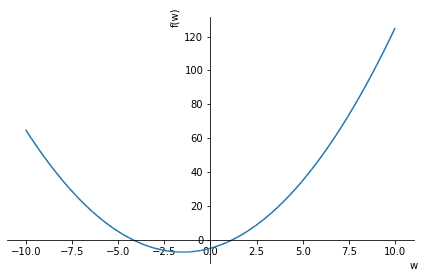

In [9]:
sympy.plotting.plot(f);

1차 미분한 식과 해는 다음과 같다.

In [10]:
fprime = f.diff(w)
fprime

In [11]:
sympy.solve(fprime, w)

### 1.2 Gradient Descent

<img src="https://nbviewer.jupyter.org/github/engineersCode/EngComp6_deeplearning/blob/master/images/descent.png
" width="400" height="300" />


기울기 함수

In [12]:
fpnum = sympy.lambdify(w, fprime)
type(fpnum)

function

Gradient descent

In [13]:
w = 10.0   # starting guess for the min

for i in range(1000):
    w = w - fpnum(w)*0.01 # with 0.01 the step size

print(w)

-1.4999999806458753


### 1.3 Linear regression

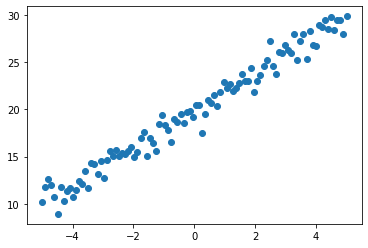

In [14]:
x_data = numpy.linspace(-5, 5, 100)
w_true = 2
b_true = 20

y_data = w_true*x_data + b_true + numpy.random.normal(size=len(x_data))

pyplot.scatter(x_data,y_data);

In [15]:
x_data.shape

In [16]:
y_data.shape

cost function

In [17]:
w, b, x, y = sympy.symbols('w b x y')

cost_function = (w*x + b - y)**2
cost_function     

Gradient Function

In [18]:
grad_b = sympy.lambdify([w,b,x,y], cost_function.diff(b), 'numpy')
grad_w = sympy.lambdify([w,b,x,y], cost_function.diff(w), 'numpy')

Gradient Descent

In [19]:
w = 0
b = 0

for i in range(1000):
    descent_b = numpy.sum(grad_b(w,b,x_data,y_data))/len(x_data)
    descent_w = numpy.sum(grad_w(w,b,x_data,y_data))/len(x_data)
    w = w - descent_w*0.01 # with 0.01 the step size
    b = b - descent_b*0.01 

print(w)
print(b)

1.9761042689363497
19.890634373408233


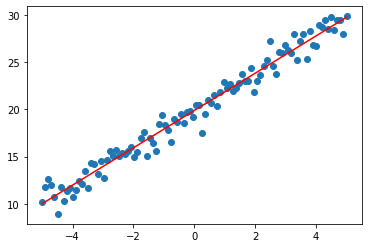

In [20]:
pyplot.scatter(x_data,y_data)
pyplot.plot(x_data, w*x_data + b, '-r');

## Earth temperature over time 

시간 흐름에 따른 지구의 온도 변화 

Global temperature anomaly

temperature anomaly는 어떠한 기준 온도 값을 정해놓고 그것과의 차이를 나타낸 것이다. 예를 들어 temperature anomaly가 양수의 높은 값을 가진다면 그것은 평소보다 따듯한 기온을 가졌다는 말이고, 음수의 작은 값을 가진다면 그것은 평소보다 차가운 기온을 가졌다는 말이다. 

### Step 1 : Read a data file

데이터 출처 : NOAA(National Oceanic and Atmospheric Administration) 홈페이지

URL : http://go.gwu.edu/engcomp1data5?accessType=DOWNLOAD

In [21]:
from urllib.request import urlretrieve
URL = 'http://go.gwu.edu/engcomp1data5?accessType=DOWNLOAD'
urlretrieve(URL, 'land_global_temperature_anomaly-1880-2016.csv')

('land_global_temperature_anomaly-1880-2016.csv',
 <http.client.HTTPMessage at 0x7f4167f30460>)

In [22]:
import numpy

In [23]:
fname = '/content/land_global_temperature_anomaly-1880-2016.csv'

year, temp_anomaly = numpy.loadtxt(fname, delimiter=',', skiprows=5, unpack=True)

### Step 2 : Plot the data

In [24]:
from matplotlib import pyplot
%matplotlib inline

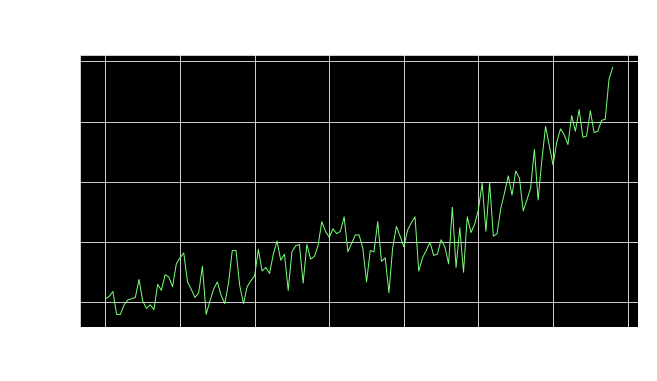

In [25]:
pyplot.rc('font', family='serif', size='18')

#You can set the size of the figure by doing:
pyplot.figure(figsize=(10,5))
pyplot.style.use('dark_background')

#Plotting
pyplot.plot(year, temp_anomaly, color='#7F7', linestyle='-', linewidth=1) 
pyplot.title('Land global temperature anomalies. \n')
pyplot.xlabel('Year')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.grid();

### Step 3 : Analytically

Linear line 정의 
$$f(x_i) = wx + b$$

cost function을 정의
cost function을 최소화한다.

$$\frac{1}{n} \sum_{i=1}^n (y_i - f(x_i))^2 = \frac{1}{n} \sum_{i=1}^n (y_i - (wx_i + b))^2$$

구하고자 하는 변수로 미분한 뒤 0이 되도록 하는 값을 찾는다. 

$b$에 대한 미분

$$\frac{\partial{J(w,b)}}{\partial{b}} = \frac{1}{n}\sum_{i=1}^n 2(y_i - (wx_i+b)) = -2b - \frac{2}{n}\left(w\sum_{i=1}^n x_i -\sum_{i=1}^n y_i\right) = 0$$
위 식을 만족하는 $b$에 대해서 정리하면 

$$b = \bar{y} - w\bar{x}$$ 
$\bar{x} = \frac{\sum_{i=1}^n x_i}{n}$ , $\bar{y} = \frac{\sum_{i=1}^n y_i}{n}$ 이다. 

$w$에 대한 미분

$$\frac{\partial{J(w,b)}}{\partial{w}} =  \frac{1}{n}\sum_{i=1}^n 2(y_i - (wx_i+b))x_i = -\frac{2}{n}\left(b\sum_{i=1}^nx_i + w\sum_{i=1}^n x_i^2 - \sum_{i=1}^n x_iy_i\right)$$ 

$b$를 대입한 후 0이 되는 $w$값은

$$w = \frac{\sum_{i=1}^ny_i(x_i-\bar{x_i})}{\sum_{i=1}^nx_i(x_i-\bar{x_i})}$$

가 된다.

In [26]:
w = numpy.sum(temp_anomaly*(year - year.mean())) / numpy.sum(year*(year - year.mean())) 
b = a_0 = temp_anomaly.mean() - w*year.mean()

print(w)
print(b)

0.01037028394347266
-20.148685384658464


In [27]:
reg = b + w * year

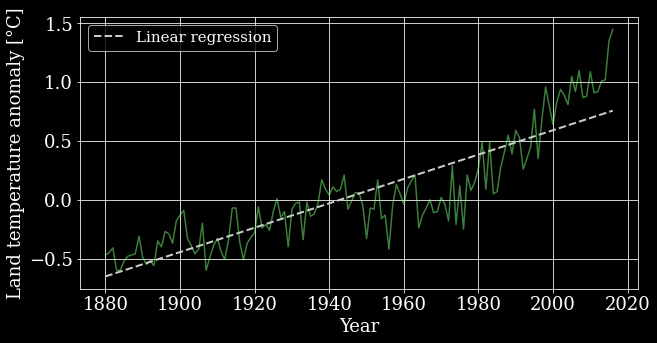

In [28]:
pyplot.figure(figsize=(10, 5))

pyplot.plot(year, temp_anomaly, color='#7F7', linestyle='-', linewidth=1.5, alpha=0.5) 
pyplot.plot(year, reg, 'k--', color='#CCC', linewidth=2, label='Linear regression')
pyplot.xlabel('Year')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.legend(loc='best', fontsize=15)
pyplot.grid();